In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [2]:
path=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Training')
classes={'no_tumor':0.0,'pituitary_tumor':1.0}

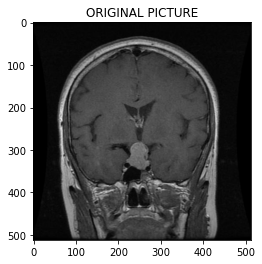

In [3]:
import cv2
x=[]
y=[]
for i in classes:
    pth=r'C:\Users\Rizwa\Downloads\archive\Training/'+i
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        im=cv2.resize(img,(200,200))
        plt.imshow(img,cmap='gray')
        plt.title('ORIGINAL PICTURE')
        x.append(im)
        y.append(classes[i])

In [4]:
print(img.shape)
print(im.shape)


(512, 512)
(200, 200)


In [ ]:
np.unique(y)

In [5]:
x=np.array(x)
y=np.array(y)
print(x.shape)

(1224, 200, 200)


In [ ]:
pd.Series(y).value_counts()

In [ ]:
x.shape

In [ ]:
#gray scale conversion
plt.imshow(x[1],cmap='gray')

In [ ]:
x1=x.reshape(len(x),-1)
x1.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape

In [42]:
print(X_train.shape)
print(X_test.shape)

(856, 200, 200, 1)
(368, 200, 200, 1)


In [ ]:
#feature scaling or normalization
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())


In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(856, 200, 200)
(368, 200, 200)
(856, 200, 200, 1)
(368, 200, 200, 1)


In [8]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
27/27 [==============================] - 17s 556ms/step - loss: 1.3884 - accuracy: 0.7114
Epoch 2/10
27/27 [==============================] - 14s 514ms/step - loss: 0.2358 - accuracy: 0.9194
Epoch 3/10
27/27 [==============================] - 14s 513ms/step - loss: 0.0503 - accuracy: 0.9918
Epoch 4/10
27/27 [==============================] - 14s 503ms/step - loss: 0.0214 - accuracy: 0.9965
Epoch 5/10
27/27 [==============================] - 14s 507ms/step - loss: 0.0381 - accuracy: 0.9988
Epoch 6/10
27/27 [==============================] - 14s 503ms/step - loss: 0.0337 - accuracy: 0.9988
Epoch 7/10
27/27 [==============================] - 14s 506ms/step - loss: 0.0316 - accuracy: 0.9977
Epoch 8/10
27/27 [==============================] - 14s 537ms/step - loss: 0.0256 - accuracy: 0.9977
Epoch 9/10
27/27 [==============================] - 14s 512ms/step - loss: 0.0559 - accuracy: 0.9977
Epoch 10/10
27/27 [==============================] - 14s 509ms/step - loss: 0.0101 - accura

In [9]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 2s 114ms/step - loss: 0.1326 - accuracy: 0.9674


[0.13263200223445892, 0.967391312122345]

In [33]:
dec={0:'No Tumor',1:'Positive Tumor'}

In [52]:
for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing\no_tumor/')[:9]:
    kp_n=[]
    img_n=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing\no_tumor/'+j,0)
    im_n=cv2.resize(img_n,(200,200))
    im_n=np.array(im_n)
    #print(im.shape)
    inp_n = im_n.reshape((1,im_n.shape[0],im_n.shape[1],1)) 
    #print(inp.shape)
    p1_n=model.predict(inp_n)
    print(dec[p1_n[0][0]])


1/1 [==============================] - 0s 44ms/step
Positive Tumor
1/1 [==============================] - 0s 33ms/step
Positive Tumor
1/1 [==============================] - 0s 49ms/step
Positive Tumor
1/1 [==============================] - 0s 33ms/step
Positive Tumor
1/1 [==============================] - 0s 27ms/step
Positive Tumor
1/1 [==============================] - 0s 32ms/step
Positive Tumor
1/1 [==============================] - 0s 47ms/step
Positive Tumor
1/1 [==============================] - 0s 38ms/step
Positive Tumor
1/1 [==============================] - 0s 34ms/step
Positive Tumor


In [53]:
for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing\pituitary_tumor/')[:9]:
    kp_p=[]
    img_p=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing\pituitary_tumor/'+j,0)
    im_p=cv2.resize(img_p,(200,200))
    im_p=np.array(im_p)
    #print(im.shape)
    inp_p = im_p.reshape((1,im_p.shape[0],im_p.shape[1],1)) 
    #print(inp.shape)
    p1_p=model.predict(inp_p)
    print(dec[p1_p[0][0]])

1/1 [==============================] - 0s 32ms/step
No Tumor
1/1 [==============================] - 0s 32ms/step
No Tumor
1/1 [==============================] - 0s 33ms/step
Positive Tumor
1/1 [==============================] - 0s 35ms/step
No Tumor
1/1 [==============================] - 0s 36ms/step
Positive Tumor
1/1 [==============================] - 0s 32ms/step
No Tumor
1/1 [==============================] - 0s 28ms/step
No Tumor
1/1 [==============================] - 0s 48ms/step
No Tumor
1/1 [==============================] - 0s 30ms/step
No Tumor


In [ ]:
pituitary_tumor

In [58]:
kp=[]
img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing\pituitary_tumor\image(3).jpg',0)
im=cv2.resize(img,(200,200))
im=np.array(im)
inp = im.reshape((1,im.shape[0],im.shape[1],1)) 
p1=model.predict(inp)
print(dec[p1[0][0]])

1/1 [==============================] - 0s 32ms/step
No Tumor


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lg=LogisticRegression(C=0.1)
lg.fit(X_train,y_train)
#lg
print("Training score",lg.score(X_train,y_train))
print("Testing score",lg.score(X_test,y_test))

y_pred_lg = lg.predict(X_test)
g1=metrics.accuracy_score(y_test, y_pred_lg)*100
print("Accuracy of LogisticRegression",g1)

print(metrics.classification_report(y_test, y_pred_lg))

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
#svm
print("Training score",svc.score(X_train,y_train))
print("Testing score",svc.score(X_test,y_test))
y_pred_sv= svc.predict(X_test)
g2=metrics.accuracy_score(y_test, y_pred_sv)*100
print("Accuracy of SVM",g2)

In [ ]:
gb=GaussianNB()
gb.fit(X_train,y_train)
#naive
print("Training score",gb.score(X_train,y_train))
print("Testing score",gb.score(X_test,y_test))
#metrics
y_pred_NB = gb.predict(X_test)
g3=metrics.accuracy_score(y_test, y_pred_NB)*100
print("Accuracy of NB",g3)

print(metrics.confusion_matrix(y_test, y_pred_NB))

In [ ]:
#decision tree
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Training score",dt.score(X_train,y_train))
print("Testing score",dt.score(X_test,y_test))
y_pred_dt= dt.predict(X_test)
g4=metrics.accuracy_score(y_test, y_pred_dt)*100
print("Accuracy of DecisionTree",g4)


In [ ]:
#knn
kn= KNeighborsClassifier()
kn.fit(X_train, y_train)
print("Training score",kn.score(X_train,y_train))
print("Testing score",kn.score(X_test,y_test))
y_pred_kn= kn.predict(X_test)
g5=metrics.accuracy_score(y_test, y_pred_kn)*100
print("Accuracy of KNN",g5)

In [ ]:
pred=lg.predict(X_test)
(np.where(y_test!=pred))

In [ ]:
pred1=svc.predict(X_test)
np.where(y_test!=pred1)

In [ ]:
pred2=gb.predict(X_test)
np.where(y_test!=pred2)

In [ ]:
pred3=dt.predict(X_test)
np.where(y_test!=pred3)

In [ ]:
pred4=kn.predict(X_test)
np.where(y_test!=pred4)

In [ ]:
pred[16]

In [ ]:
y_test[21]

In [ ]:
dec={0:'No Tumor',1:'Positive Tumor'}

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=svc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/')[1:10]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=svc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
           #  LOGISTIC REGRESSION

In [ ]:
plt.figure(figsize=(12,8))
p1=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p1=lg.predict(img1)
    plt.title(dec[p1[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p1=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/')[1:10]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p1=lg.predict(img1)
    plt.title(dec[p1[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
           #NAIVE BAYES

In [ ]:
plt.figure(figsize=(12,8))
p2=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p2=gb.predict(img1)
    plt.title(dec[p2[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p2=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/')[1:10]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p2=gb.predict(img1)
    plt.title(dec[p2[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
           #DECISION TREE

In [ ]:
plt.figure(figsize=(12,8))
p3=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p3=dt.predict(img1)
    plt.title(dec[p3[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p3=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/')[1:10]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p3=dt.predict(img1)
    plt.title(dec[p3[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
             #KNN

In [ ]:
plt.figure(figsize=(12,8))
p4=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/no_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p4=kn.predict(img1)
    plt.title(dec[p4[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p4=os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/')
c=1

for j in os.listdir(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/')[1:10]:
    plt.subplot(3,3,c)
    img=cv2.imread(r'C:\Users\Rizwa\Downloads\archive\Testing/pituitary_tumor/'+j,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p4=kn.predict(img1)
    plt.title(dec[p4[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
a=[g1,g2,g3,g4,g5]

b=['LG','SVM','NB','DT','KNN']
c=[10,20,30,40,50]
fig, ax = plt.subplots()
per=ax.bar(c,a,tick_label=b,color=['red','blue','green','yellow','pink'],width=6,align='center')
for p in per:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{0:0.0f}%".format(height),
      ha='center')
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy score")
plt.title("All Algorithms Graphs for Accuracy")

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test,y_pred_NB)
print(roc_auc) 

In [ ]:
# predict probabilities
prob =lg.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = prob[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC-CURVE FOR LOGISTIC REGRESSION')
# show the plot
plt.show()

In [ ]:
# predict probabilities
prob_svc =gb.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs_svc = prob_svc[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fprs, tprs, _ = roc_curve(y_test, pos_probs_svc)
# plot model roc curve
plt.plot(fprs, tprs, marker='.', label='GB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC-CURVE FOR NAIVE BAYES')
# show the plot
plt.show()

In [ ]:
# predict probabilities
prob_sv =dt.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs_sv = prob_svc[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fprs, tprs, _ = roc_curve(y_test, pos_probs_sv)
# plot model roc curve
plt.plot(fprs, tprs, marker='.', label='DT')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC-CURVE FOR DECISION TREE')
# show the plot
plt.show()

In [ ]:
# predict probabilities
prob_s =kn.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs_s = prob_s[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fprs, tprs, _ = roc_curve(y_test, pos_probs_s)
# plot model roc curve
plt.plot(fprs, tprs, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC-CURVE FOR KNN')
# show the plot
plt.show()

In [ ]:
 #cross validation

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
#Lg
print(cross_val_score(lg,x1,y,cv=3).mean())
print(cross_val_score(lg,x1,y,cv=5).mean())
print(cross_val_score(lg,x1,y,cv=7).mean())

In [ ]:
#SVM
print(cross_val_score(svc,x1,y,cv=3).mean())
print(cross_val_score(svc,x1,y,cv=5).mean())
print(cross_val_score(svc,x1,y,cv=7).mean())

In [ ]:
#NB
print(cross_val_score(gb,x1,y,cv=3).mean())
print(cross_val_score(gb,x1,y,cv=5).mean())
print(cross_val_score(gb,x1,y,cv=7).mean())

In [ ]:
#decision tree
print(cross_val_score(dt,x1,y,cv=3).mean())
print(cross_val_score(dt,x1,y,cv=5).mean())
print(cross_val_score(dt,x1,y,cv=7).mean())

In [ ]:
#KNN
print(cross_val_score(kn,x1,y,cv=3).mean())
print(cross_val_score(kn,x1,y,cv=5).mean())
print(cross_val_score(kn,x1,y,cv=7).mean())